In [1]:
import pandas as pd
from ord_data_load import is_reaction_of_type
from rdkit.Chem.AllChem import ReactionFromSmarts
from ord_data_load import draw_reaction_rand
from ord_data_load import ORD_PATH, ORD_REPO_PATH

#to disable warnings
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*')

In [2]:
pd_df = pd.read_pickle(f'{ORD_PATH}/pd_df.pkl')

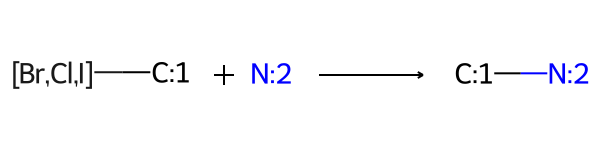

In [3]:
BUCHWALD_RXN_SMARTS = "[c:1]-[Br,Cl,I].[NX3:2]>>[c:1]-[NX3:2]"
rxn_pattern = ReactionFromSmarts(BUCHWALD_RXN_SMARTS)
rxn_pattern

In [4]:
%%time
mask = pd_df['reaction_smile'].apply(is_reaction_of_type, reaction_type_pattern=rxn_pattern)
df_buchwald = pd_df[mask].copy()
len(df_buchwald)

CPU times: total: 1min 57s
Wall time: 1min 57s


8854

In [62]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
ProgressBar().register()

dds = dd.from_pandas(pd_df['reaction_smile'], npartitions=240)
mask = dds.apply(is_reaction_of_type,
                 reaction_type_pattern=rxn_pattern,
                 meta=pd.Series(dtype=bool)).compute(scheduler='threads')
df_buchwald = pd_df[mask].copy()
len(df_buchwald)

[########################################] | 100% Completed | 138.80 s
[########################################] | 100% Completed | 138.90 s
[########################################] | 100% Completed | 139.00 s


8854

Reaction: 7225
Solvent: [['water', 'O']]
Catalyst [['palladium on carbon', '[Pd]']]


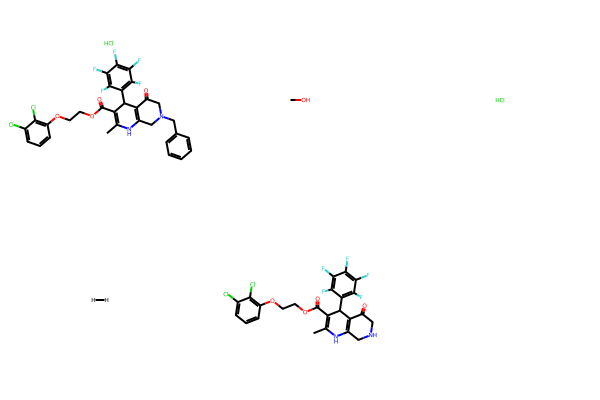

The hydrochloride from above (10 g), 500 ml of methanol, 25 ml of water, 5 ml of concentrated hydrochloric acid and 0.5 g of 10% palladium on carbon were shaken with hydrogen (45 psig initial pressure) for 4 hours. The catalyst was separated and the solution was evaporated to dryness. The residue was dissolved in ethyl acetate and shaken with dilute sodium hydroxide solution. The ethyl acetate solution was dried over magnesium sulfate, then evaporated to dryness. The residue was dissolved in methanol and saturated with hydrogen chloride. The solution was evaporated to dryness. The residue crystallized on standing with ethyl acetate for 3 days. The solid was treated with boiling ethyl acetate and filtered to obtain the title compound as the hydrochloride, m.p. 228°-231° C. dec.


In [5]:
draw_reaction_rand(df_buchwald)